In [1]:
import nltk
import pymorphy2
import gensim
import pyLDAvis

C:\Users\User\Anaconda3\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
name = '"Sociology2018"'
f_in2 = open('Text2018.txt', 'r')
text = f_in2.read()\

In [3]:
print (text)

"«Левада-центр» отказался публиковать предвыборные опросы
Крупнейший независимый организатор соцопросов в России «Левада-центр» отказался от публикации данных в ходе президентских выборов. Ранее организацию признали иностранным агентом, существенно усложнив ей деятельность в сфере политики.
С 2014 года организациям-иноагентам запрещено помогать кандидатам, «а также в иных формах участвовать в избирательных кампаниях». Прямого запрета на публикацию соцопросов в законе нет, однако от «Левада-центра» требуется соблюдение строгих сроков и правил опубликования информации, в противном случае ему грозят штрафы.
Таким образом, на рынке политических социологических исследований остаются правительственные организации ФОМ и ВЦИОМ. «Ведомости» отмечают, что у последнего с «Левадой-центром» иногда были заметные расхождения в результатах опросов. Так, в декабре, по данным «Левады», «совершенно точно» намеревались голосовать 28 % россиян, «скорее всего» — 30 %, ВЦИОМ же оценивал эти категории соответ

In [4]:
tokens = [t for t in text.split()] 
print (tokens)

['"«Левада-центр»', 'отказался', 'публиковать', 'предвыборные', 'опросы', 'Крупнейший', 'независимый', 'организатор', 'соцопросов', 'в', 'России', '«Левада-центр»', 'отказался', 'от', 'публикации', 'данных', 'в', 'ходе', 'президентских', 'выборов.', 'Ранее', 'организацию', 'признали', 'иностранным', 'агентом,', 'существенно', 'усложнив', 'ей', 'деятельность', 'в', 'сфере', 'политики.', 'С', '2014', 'года', 'организациям-иноагентам', 'запрещено', 'помогать', 'кандидатам,', '«а', 'также', 'в', 'иных', 'формах', 'участвовать', 'в', 'избирательных', 'кампаниях».', 'Прямого', 'запрета', 'на', 'публикацию', 'соцопросов', 'в', 'законе', 'нет,', 'однако', 'от', '«Левада-центра»', 'требуется', 'соблюдение', 'строгих', 'сроков', 'и', 'правил', 'опубликования', 'информации,', 'в', 'противном', 'случае', 'ему', 'грозят', 'штрафы.', 'Таким', 'образом,', 'на', 'рынке', 'политических', 'социологических', 'исследований', 'остаются', 'правительственные', 'организации', 'ФОМ', 'и', 'ВЦИОМ.', '«Ведомости

In [5]:
import string
def tokenizer(text):
    for elem in set(string.punctuation + '«»…—'):
        if elem in text:
            text = text.replace(elem, ' ')
    return(''.join(word for word in text if not word.isdigit()).lower().split())
tokens = tokenizer(text)
print(tokens)

['левада', 'центр', 'отказался', 'публиковать', 'предвыборные', 'опросы', 'крупнейший', 'независимый', 'организатор', 'соцопросов', 'в', 'россии', 'левада', 'центр', 'отказался', 'от', 'публикации', 'данных', 'в', 'ходе', 'президентских', 'выборов', 'ранее', 'организацию', 'признали', 'иностранным', 'агентом', 'существенно', 'усложнив', 'ей', 'деятельность', 'в', 'сфере', 'политики', 'с', 'года', 'организациям', 'иноагентам', 'запрещено', 'помогать', 'кандидатам', 'а', 'также', 'в', 'иных', 'формах', 'участвовать', 'в', 'избирательных', 'кампаниях', 'прямого', 'запрета', 'на', 'публикацию', 'соцопросов', 'в', 'законе', 'нет', 'однако', 'от', 'левада', 'центра', 'требуется', 'соблюдение', 'строгих', 'сроков', 'и', 'правил', 'опубликования', 'информации', 'в', 'противном', 'случае', 'ему', 'грозят', 'штрафы', 'таким', 'образом', 'на', 'рынке', 'политических', 'социологических', 'исследований', 'остаются', 'правительственные', 'организации', 'фом', 'и', 'вциом', 'ведомости', 'отмечают', '

In [6]:
bag_of_words = tokenizer(text)

In [7]:
word_us_numb = len(bag_of_words)
print('The number of total word usage in the book', name, ': ', word_us_numb)

The number of total word usage in the book "Sociology2018" :  24077


In [8]:
set_of_words = set(bag_of_words)
word_form_numb = len(set_of_words)
print('The number of different word forms in the book', name, ': ', word_form_numb)

The number of different word forms in the book "Sociology2018" :  6980


In [9]:
lens_of_words = [len(word) for word in bag_of_words]
print('Average word length in the book', name, ': ', round(sum(lens_of_words)/len(lens_of_words),2))

Average word length in the book "Sociology2018" :  5.97


In [10]:
import collections as cl #библиотека для подсчета в списке количества элементов
from matplotlib import pyplot as plt #библиотека для построения диаграммы
get_ipython().run_line_magic('matplotlib', 'inline')
dist_distr = cl.Counter(lens_of_words)
sorted_elems = sorted(dist_distr.items())
keys = [i[0] for i in sorted_elems]
values = [i[1] for i in sorted_elems]

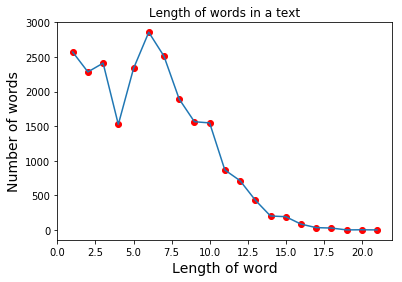

In [11]:
plt.title('Length of words in a text')
plt.xlabel('Length of word', fontsize=14)
plt.ylabel('Number of words', fontsize=14)
plt.plot(keys, values, 'ro')
plt.plot(keys, values)

In [12]:
bag_of_sentences = [sent for sent in text.split('.') if (sent != '') ]
list_of_bags = [tokenizer(sent) for sent in bag_of_sentences]
lens_of_sentences = [len(list) for list in list_of_bags]
average_len_of_sentence = round(sum(lens_of_sentences)/len(lens_of_sentences), 2)
print('Average length of sentence in the text', name, ': ', average_len_of_sentence)

Average length of sentence in the text "Sociology2018" :  16.11


In [13]:
dist_distr = cl.Counter(lens_of_sentences)
sorted_elems = sorted(dist_distr.items())
keys = [i[0] for i in sorted_elems]
values = [i[1] for i in sorted_elems]

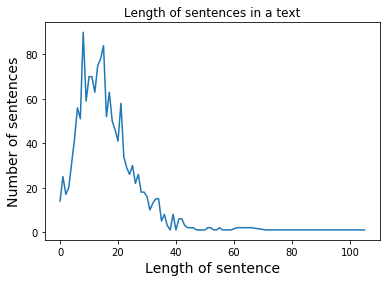

In [14]:
plt.title('Length of sentences in a text')
plt.xlabel('Length of sentence', fontsize=14)
plt.ylabel('Number of sentences', fontsize=14)
#plt.plot(keys, values, 'ro')
plt.plot(keys, values)

In [ ]:
# Cleam tokens without stopwords 

In [15]:
from nltk.corpus import stopwords
stopwords.words('russian')

['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

In [16]:
clean_tokens = tokens[:] 
sr = stopwords.words('russian')
for token in tokens:
    if token in sr:
        clean_tokens.remove(token)

In [17]:
freq = nltk.FreqDist(clean_tokens) 
for key, val in freq.items(): 
    print (str(key) + ':' + str(val))

левада:24
центр:15
отказался:2
публиковать:2
предвыборные:1
опросы:61
крупнейший:1
независимый:2
организатор:1
соцопросов:19
россии:75
публикации:4
данных:11
ходе:8
президентских:4
выборов:21
ранее:8
организацию:1
признали:1
иностранным:1
агентом:1
существенно:4
усложнив:1
деятельность:4
сфере:1
политики:5
года:53
организациям:2
иноагентам:1
запрещено:2
помогать:3
кандидатам:1
также:18
иных:3
формах:1
участвовать:2
избирательных:1
кампаниях:1
прямого:2
запрета:1
публикацию:3
законе:2
однако:10
центра:26
требуется:4
соблюдение:1
строгих:1
сроков:1
правил:1
опубликования:1
информации:25
противном:1
случае:10
грозят:1
штрафы:1
таким:10
образом:10
рынке:1
политических:8
социологических:15
исследований:8
остаются:3
правительственные:1
организации:3
фом:23
вциом:74
ведомости:1
отмечают:2
последнего:2
левадой:1
центром:3
заметные:1
расхождения:2
результатах:7
опросов:64
декабре:2
данным:26
левады:5
совершенно:2
точно:9
намеревались:1
голосовать:5
россиян:71
скорее:17
оценивал:1
категории:1
со

марта:13
заключил:3
аналитик:6
григорий:3
кертман:6
заявление:3
некорректном:2
определении:2
рейтинга:3
чушью:3
обычная:4
стандартная:2
чушь:2
бывает:6
кандидаты:4
мало:7
набирают:3
обижаются:3
социологию:4
пишут:4
социология:16
фальшивая:3
ненастоящая:3
кертмана:3
ситуация:6
предвыборный:2
период:5
доля:12
опрошенных:40
некоторые:7
определились:3
выбором:3
собираются:4
вполне:9
набрать:4
ксения:5
instagram:3
обвинила:4
сообщению:2
прикрепила:2
фотографию:4
telegram:4
канала:4
опер:4
слил:4
которой:5
запечатлен:3
отчет:3
подготовленный:3
фото:3
документ:4
гербом:3
подписью:3
усо:3
сбп:3
зачеркнуты:3
документе:2
приведены:2
определившихся:3
готовы:10
проголосовать:8
одного:13
заявленных:2
восьми:3
публикуемая:3
статистика:4
инструментом:4
управления:5
общественным:6
мнением:10
кандидат:5
стране:23
разделяют:3
либеральные:4
должны:11
выбирать:4
коммунистами:5
сталинистами:4
клоунами:4
либо:11
ходить:7
опубликовал:3
опроса:36
согласно:12
которым:10
составит:3
жириновского:5
явлинского:5
с

одной:3
незнакомым:1
обобщенным:1
устойчивый:2
квадрат:1
технологическим:2
институциональным:1
негативно:3
коррелируют:2
ключевые:1
переломы:1
сферах:1
незаметно:1
е:9
воспринимаем:2
далекое:1
далекими:1
технологическом:1
отношении:5
практик:1
делегирования:1
ключевых:1
функций:1
общий:2
тренд:1
российский:1
проявился:1
своей:10
спецификой:1
фактор:2
скоррелировал:1
парадокс:6
технологическая:2
подстегивание:1
новую:3
волну:1
технологических:1
революций:1
изначально:2
частью:2
официальной:4
риторики:1
повестки:2
воспринята:1
риторика:3
теми:4
мечтал:1
новом:1
спутнике:1
символе:1
мощи:1
надеялся:1
рывок:1
позволит:4
обойтись:1
самыми:2
технооптимистичными:1
странами:1
оказываются:1
бывшего:1
восточного:1
блока:1
штатах:2
ровным:2
счетом:2
европа:1
умеренные:1
техноскептики:1
штаты:1
серьезная:1
технофобия:1
беспокойство:1
развитие:5
техники:1
ближайшем:1
будущем:2
приведет:1
волне:1
безработицы:1
последнем:1
американского:1
аналитического:1
pew:1
research:1
center:1
май:2
выразили:2
оп

выходят:2
трусах:1
сковородкой:1
наперевес:1
спинами:1
зияет:1
бездонная:1
пучина:1
унылого:1
быта:1
уличным:1
проще:5
главное:4
шумное:1
хорошей:1
проходимостью:1
рядом:1
магазином:1
поликлиникой:1
почтой:1
детской:1
площадкой:1
локации:1
скорость:2
однажды:4
целый:1
простоял:1
перекрестке:1
спешили:1
ответили:3
десять:2
вечеру:1
догадался:1
перейти:1
тихий:1
сквер:1
семейными:1
парами:1
мамочками:1
часа:5
опросил:2
улицу:1
склонны:1
причесываться:1
прилично:1
одеваться:1
всячески:1
прикрывать:1
быт:1
класса:1
респондента:9
получится:2
определить:2
взглянув:1
умелый:1
скомпоновать:1
страницу:3
подвопросов:1
выяснить:2
исследователи:2
пилотажный:2
тестируют:1
инструктаже:1
уточняйте:1
тест:1
занял:1
делали:3
непонятно:2
потратите:1
возможно:5
составлены:1
скомпонованной:2
занимает:3
зашито:2
переменных:2
заполнение:3
уйдет:2
дополняют:2
карточки:2
отдельных:2
листах:2
показывает:7
сложная:1
респонденту:1
предложить:2
подарок:1
мелочь:1
шариковая:1
ручка:1
имейте:1
сувениры:1
оплачивают

директору:1
региональных:1
дмитрию:1
журавлеву:1
бесполезна:1
изменение:1
измерение:1
восприятия:1
важно:5
умный:2
коррупционер:1
замечает:2
ездит:1
майбахе:1
шубе:1
соболей:1
раздробленной:1
области:3
куплено:2
серьезному:1
грабителю:1
грабеж:1
показывать:1
имеем:1
объективную:1
субъективную:1
полезно:1
понять:2
многом:2
социальную:1
оценке:1
проблемой:1
губернаторов:2
отчитываться:1
проведении:1
губернаторы:1
унтер:1
офицерская:1
вдова:1
посылать:1
региона:6
стоять:1
первом:2
любая:1
позиции:3
заказчика:1
любом:3
губернатор:4
бюджете:1
центральные:1
дадут:1
губернатору:1
дотацию:1
меряем:2
главным:1
определению:1
поподробнее:1
уверяю:1
напишут:1
республики:1
родственники:1
иного:3
начальника:1
родоплеменном:1
коррупция:5
огромная:1
центральной:1
скажут:1
коррупционеры:1
живется:1
голова:1
утрам:1
болит:1
субъективно:2
объективно:1
решающим:1
коррупционера:1
ловить:1
затратах:1
забираются:1
бюджета:2
широком:1
сравните:1
затраты:2
эффективными:1
затратами:1
разница:1
конкретного:1
губ

считывается:1
продолжение:2
спросите:1
чье:1
высказались:1
особо:1
рассчитывал:1
пенсию:3
брежневском:1
удаляемся:1
обрадованных:1
немолодые:1
друзья:1
буржуа:1
нормально:1
понимающие:1
сколь:1
серьезен:1
пенсиями:1
зарплатами:1
благом:1
начальство:2
кривиться:1
возрастной:2
работники:2
умственного:1
труда:3
врачи:1
учителя:1
выталкивают:1
устал:1
ждет:1
манны:1
небесной:1
отдохнуть:1
занят:1
относительно:3
простым:1
физическим:1
тяжелым:2
малооплачиваемым:1
трудом:1
воспринимали:1
расплату:1
тяжелые:1
долгие:2
скучные:1
кои:1
веки:1
вдохнуть:1
грудью:1
подлечиться:1
заняться:1
садовым:1
участком:1
воспитанием:1
внуков:1
условии:2
молодая:1
сидящих:1
внуками:1
работающие:1
бабушки:1
интересы:4
моих:1
коллег:1
анализируя:2
важную:2
разное:1
сложное:1
грести:1
гребенку:1
выбора:1
большого:1
траекторий:1
движения:1
разным:1
капиталом:1
образовательным:1
п:13
унифицирует:1
загоняет:1
стандарт:1
та:1
простота:1
воровства:1
подписи:1
собирают:1
молодые:1
субъектного:1
пенсия:1
дальняя:1
перс

потеряли:1
ссылкой:1
собственный:1
манипулирования:1
придерживались:1
соцопрос:1
посвященный:1
специалисты:1
придерживалось:1
высокие:1
необходимым:1
сократить:1
подобными:1
заголовками:1
пестрели:1
новостные:1
ленты:1
указывает:1
полумертва:1
значат:1
подменяют:1
надежного:1
сведений:1
вверенной:1
имитация:1
аукнуться:1
неприятным:1
малолюбопытны:1
приведем:1
главные:1
перелистните:1
концу:2
скучных:1
нескучные:1
потребительское:1
высчитываемый:1
изменилось:2
считающих:2
благоприятным:1
покупок:1
неплохой:1
пришло:1
существенных:1
трат:1
целых:1
повседневную:1
экономию:1
сложном:1
стабилен:1
всему:3
установка:1
бережливость:1
подходящее:1
крупный:1
поступать:1
учитывая:1
закредитованность:1
предположить:1
накопившийся:1
негативный:1
личный:1
кредитам:1
выросли:1
терпимыми:1
неизбежным:1
раскручиванием:1
оказаться:1
выгодными:1
пора:1
размещать:1
депозитах:1
поднимался:1
создается:1
обязательном:1
страховании:1
вкладов:1
руб:1
давала:1
сбоев:1
забрать:1
банка:2
деть:1
совпадает:2
созре

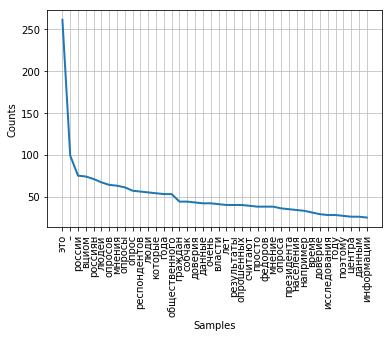

In [18]:
get_ipython().run_line_magic('matplotlib', 'inline')
freq.plot(40, cumulative=False)

In [19]:
nltk.download('wordnet')
from nltk.corpus import wordnet as wn
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [20]:
morph = pymorphy2.MorphAnalyzer()
dict = [morph.parse(word) for word in clean_tokens] #обработанный с помощью парсера словарь слов с информацией о каждом слове
normal_forms = [word[0].normal_form for word in dict]
print(normal_forms)

['левада', 'центр', 'отказаться', 'публиковать', 'предвыборный', 'опрос', 'крупный', 'независимый', 'организатор', 'соцопрос', 'россия', 'левада', 'центр', 'отказаться', 'публикация', 'дать', 'ход', 'президентский', 'выбор', 'ранее', 'организация', 'признать', 'иностранный', 'агент', 'существенно', 'усложнить', 'деятельность', 'сфера', 'политика', 'год', 'организация', 'иноагент', 'запретить', 'помогать', 'кандидат', 'также', 'иной', 'форма', 'участвовать', 'избирательный', 'кампания', 'прямой', 'запрет', 'публикация', 'соцопрос', 'закон', 'однако', 'левада', 'центр', 'требоваться', 'соблюдение', 'строгий', 'срок', 'правило', 'опубликование', 'информация', 'противный', 'случай', 'грозить', 'штраф', 'такой', 'образ', 'рынок', 'политический', 'социологический', 'исследование', 'оставаться', 'правительственный', 'организация', 'фома', 'вциома', 'ведомость', 'отмечать', 'последний', 'левада', 'центр', 'заметный', 'расхождение', 'результат', 'опрос', 'декабрь', 'данные', 'левада', 'совершен

In [21]:
freq = nltk.FreqDist(normal_forms) 
for key, val in freq.items(): 
    print (str(key) + ':' + str(val))

левада:30
центр:53
отказаться:4
публиковать:9
предвыборный:4
опрос:266
крупный:8
независимый:5
организатор:1
соцопрос:37
россия:83
публикация:10
дать:62
ход:8
президентский:5
выбор:39
ранее:8
организация:12
признать:4
иностранный:7
агент:1
существенно:4
усложнить:1
деятельность:12
сфера:3
политика:26
год:181
иноагент:1
запретить:4
помогать:16
кандидат:28
также:18
иной:14
форма:5
участвовать:4
избирательный:1
кампания:2
прямой:3
запрет:2
закон:7
однако:10
требоваться:4
соблюдение:1
строгий:1
срок:4
правило:7
опубликование:2
информация:31
противный:1
случай:13
грозить:1
штраф:1
такой:67
образ:14
рынок:4
политический:41
социологический:62
исследование:77
оставаться:9
правительственный:1
фома:24
вциома:82
ведомость:1
отмечать:3
последний:37
заметный:5
расхождение:2
результат:101
декабрь:2
данные:26
совершенно:2
точно:9
намереваться:1
голосовать:9
россиянин:84
скорее:17
оценивать:2
категория:3
соответственно:9
картина:12
реальный:20
предпочтение:2
отказ:2
повлиять:2
полагать:15
политолог:5


большой:16
животный:1
название:3
оно:9
мутировать:2
эволюционировать:1
немой:3
левиафан:1
насколько:10
постарелый:1
кишечник:1
засориться:1
умный:5
знаете:2
структурный:2
дифференциация:2
социетальный:1
трансформация:1
любить:5
мой:5
коллега:4
обозначить:1
сформироваться:4
данный:2
наклеивать:1
ярлык:2
старый:1
добрый:1
экспертный:4
сообщество:2
обозвать:3
подручный:1
мир:13
лукавый:1
посттоталитарный:1
абортивный:1
модернизация:5
геометрический:1
прогрессия:1
самобытный:2
самопальный:1
простить:1
критически:2
попытка:5
заниматься:13
журналистика:1
называть:8
вещий:3
понятие:7
смысл:12
медиа:5
использоваться:10
довольно:9
долго:5
соображение:1
простота:2
удобство:2
пик:1
национальный:9
схватывать:1
объяснять:7
конец:17
х:13
дебаты:1
обманывать:1
многообразие:1
взаимодействие:2
странный:1
сначала:4
смерть:1
концепт:2
предсказать:1
немецкий:2
никласа:1
лумать:1
правда:7
спасти:1
придать:1
новый:17
британский:2
джон:3
урри:1
книга:1
хх:1
столетие:1
усилие:3
француз:1
брюный:1
латур:1
окон

хозяин:1
задумчиво:1
произнести:1
миловать:1
закрыть:2
избежать:2
негатив:1
одинаковый:3
острый:1
тема:7
безобидный:3
профессиональный:3
пофигизм:1
грубиян:1
характеризовать:1
доброжелательно:1
охотно:1
неизвестно:2
дом:7
опасный:3
редко:1
конкретно:3
окончание:1
надевать:1
дорогой:1
украшение:1
откровенный:2
пирсинг:1
дредова:1
скандал:2
праздник:3
проехать:1
лифт:1
собраться:1
пьяный:2
подросток:2
страшный:2
случаться:1
схватить:1
потянуть:1
счастие:1
удаться:3
вырваться:1
угрожать:1
опасность:2
нарушать:1
кухня:2
двое:2
решать:2
узнать:15
мошенник:2
непонятный:1
вынюхивать:1
подозрительно:1
вы:1
жулик:3
помимо:1
десяток:1
номер:5
контролёр:1
лишний:2
завязать:1
свести:2
посторонний:1
гореть:1
продать:1
бесплатный:3
паспорт:1
подталкивать:1
сэкономить:3
подделка:2
оставлять:1
нанять:1
проверять:1
анонимный:2
телефонный:6
обзвон:2
контроль:3
приём:1
чистый:1
аккуратно:1
сдать:1
фальсификат:1
опыт:10
бумага:2
кофе:1
ронять:1
грязь:1
пятно:1
кровь:1
диалог:4
лестничный:1
стрессовый:1
ит

траектория:1
движение:1
образовательный:1
плата:14
унифицировать:1
загонять:1
стандарт:1
воровство:1
субъектный:1
дальний:1
всколыхнуть:1
монетизация:1
льгота:1
обида:1
ощутить:2
затронуть:2
интенсивно:1
включиться:1
оппозиция:2
греть:1
винить:1
трудно:1
пригодиться:1
оправиться:1
предлагать:1
обменять:1
хватить:1
повысить:1
длительный:1
осознание:1
повредить:1
долг:1
трек:1
прибавлять:1
импульс:2
лексуса:1
недорогой:1
бытовой:1
средство:6
финансирование:3
инфраструктура:2
указ:1
существенный:2
строительство:1
аэропорт:1
дорога:2
модернизировать:1
осуществить:2
смертность:1
увеличивать:1
рождаемость:1
смешно:2
соединять:2
энергия:2
воля:6
талант:2
индустриализация:2
ворчание:1
гигант:1
пятилетка:1
закрываться:2
увольнять:1
индустриальный:1
вымирать:1
завод:4
строиться:1
гигантский:1
десятка:1
компактный:1
высоко:1
автоматизировать:1
плановый:1
специально:1
обслуживать:1
рыночный:3
спрос:2
строить:1
множить:1
риска:2
пускать:1
ветер:1
реиндустриализация:1
неэкономический:1
мощность:1
ме

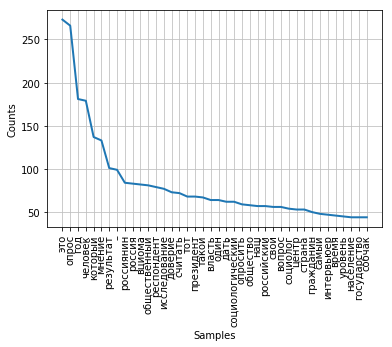

In [22]:
from nltk import FreqDist
freq = FreqDist(normal_forms) 
freq.plot(40, cumulative=False)

In [23]:
lemms = list(set(normal_forms))
print('The number of unique lemmas in', name, ': ', len(lemms)) #число лем - длина набора нормальных форм

The number of unique lemmas in "Sociology2018" :  3959


In [24]:
noun_lemms = [word[0].normal_form for word in dict if (word[0].tag.POS=='NOUN')] #существительные находятся по тегу NOUN
print('The number of unique lemmas in nouns: ', len(set(noun_lemms)))

The number of unique lemmas in nouns:  1794


In [25]:
import numpy as np

In [26]:
set_noun_lemms = list(set(noun_lemms))
noun_occurs = [normal_forms.count(word) for word in set_noun_lemms] #встречаемость каждой леммы сущ в тексте
arr = np.array(noun_occurs)
top_noun_index = arr.argsort()[::-1]
top_noun = set_noun_lemms[top_noun_index[0]] #самое частотное существительное
print('The 1-st place from the most frequent nouns in the text', name, ' is taken by the word "', set_noun_lemms[top_noun_index[0]], '", that is used ', noun_occurs[top_noun_index[0]], ' times')

The 1-st place from the most frequent nouns in the text "Sociology2018"  is taken by the word " опрос ", that is used  266  times


In [27]:
adj_lemms = [word[0].normal_form for word in dict if (word[0].tag.POS=='ADJF' or word[0].tag.POS=='ADJS')] #прилагательные находятся по тегам ADJF и ADJS
print('The number of unique lemmas in adjectives', name, ': ', len(set(adj_lemms)))

The number of unique lemmas in adjectives "Sociology2018" :  767


In [28]:
set_adj_lemms = list(set(adj_lemms))
adj_occurs = [normal_forms.count(word) for word in set_adj_lemms] #встречаемость каждой леммы прил в тексте
arr = np.array(adj_occurs)
top_adj_index = arr.argsort()[::-1]
top_adj = set_adj_lemms[top_adj_index[0]] #самое частотное прилагательное
print('The 1-st place from the most frequent adjectives in the text', name, ' is taken by the word "', set_adj_lemms[top_adj_index[0]], '", that is used ', adj_occurs[top_adj_index[0]], ' times')

The 1-st place from the most frequent adjectives in the text "Sociology2018"  is taken by the word " который ", that is used  137  times


In [29]:
verb_lemms = [word[0].normal_form for word in dict if (word[0].tag.POS=='VERB' or word[0].tag.POS=='INFN')] #глаголы находятся по тегам VERB и INF
print('The number of unique lemmas in verbs', name, ': ', len(set(verb_lemms)))

The number of unique lemmas in verbs "Sociology2018" :  866


In [54]:
set_verb_lemms = list(set(verb_lemms))
verb_occurs = [normal_forms.count(word) for word in set_verb_lemms] #встречаемость каждой леммы глаг в тексте
arr = np.array(verb_occurs)
top_verb_index = arr.argsort()[::-1]
top_verb = set_verb_lemms[top_verb_index[0]] #самый частотный глагол
print('The 1-st place from the most frequent verbs in the text', name, ' is taken by the word "', set_verb_lemms[top_verb_index[0]], '", that is used ', verb_occurs[top_verb_index[0]], ' times')

The 1-st place from the most frequent verbs in the text "Sociology2019"  is taken by the word " доверять ", that is used  85  times


In [ ]:
# Bigrams 

In [30]:
word = "вциома"
tnb = [] #создается и заполняется список слов, образующих биграммы с частотным существительным
for i in range(len(normal_forms)):
    if normal_forms[i] == word:
        tnb.append(normal_forms[i-1])
set_tn = list(set(tnb))
noun_occurs = [tnb.count(word) for word in set_tn] #встречаемость биграммы частотного сущ с каждым из слов, с которыми это частотное слово встречается в тексте
arr_noun = np.array(noun_occurs)
top_noun_index = arr_noun.argsort()[::-1]
s = 1
for i in top_noun_index:
    if noun_occurs[i] > 0:
        print(s,'. ', word, ' + ', set_tn[i], ': ', noun_occurs[i], ' times')
        s += 1

1 .  вциома  +  опрос :  13  times
2 .  вциома  +  мнение :  13  times
3 .  вциома  +  фома :  11  times
4 .  вциома  +  директор :  5  times
5 .  вциома  +  данные :  5  times
6 .  вциома  +  глава :  4  times
7 .  вциома  +  рбк :  2  times
8 .  вциома  +  центр :  2  times
9 .  вциома  +  выбор :  2  times
10 .  вциома  +  эксперт :  2  times
11 .  вциома  +  прогноз :  2  times
12 .  вциома  +  гендиректор :  1  times
13 .  вциома  +  партнёр :  1  times
14 .  вциома  +  сократиться :  1  times
15 .  вциома  +  смирнов :  1  times
16 .  вциома  +  неугодный :  1  times
17 .  вциома  +  отметить :  1  times
18 .  вциома  +  бог :  1  times
19 .  вциома  +  сообщение :  1  times
20 .  вциома  +  год :  1  times
21 .  вциома  +  высчитывать :  1  times
22 .  вциома  +  чаща :  1  times
23 .  вциома  +  исследование :  1  times
24 .  вциома  +  утверждать :  1  times
25 .  вциома  +  специалист :  1  times
26 .  вциома  +  скорее :  1  times
27 .  вциома  +  ранее :  1  times
28 .  вци

In [31]:
word = "фома"
tnb = [] #создается и заполняется список слов, образующих биграммы с частотным существительным
for i in range(len(normal_forms)):
    if normal_forms[i] == word:
        tnb.append(normal_forms[i-1])
set_tn = list(set(tnb))
noun_occurs = [tnb.count(word) for word in set_tn] #встречаемость биграммы частотного сущ с каждым из слов, с которыми это частотное слово встречается в тексте
arr_noun = np.array(noun_occurs)
top_noun_index = arr_noun.argsort()[::-1]
s = 1
for i in top_noun_index:
    if noun_occurs[i] > 0:
        print(s,'. ', word, ' + ', set_tn[i], ': ', noun_occurs[i], ' times')
        s += 1

1 .  фома  +  аналитик :  4  times
2 .  фома  +  обвинить :  4  times
3 .  фома  +  мнение :  3  times
4 .  фома  +  публиковать :  3  times
5 .  фома  +  вциома :  2  times
6 .  фома  +  дать :  2  times
7 .  фома  +  опрос :  2  times
8 .  фома  +  рейтинг :  1  times
9 .  фома  +  данные :  1  times
10 .  фома  +  организация :  1  times
11 .  фома  +  давать :  1  times


In [32]:
word = "левада"
tnb = [] #создается и заполняется список слов, образующих биграммы с частотным существительным
for i in range(len(normal_forms)):
    if normal_forms[i] == word:
        tnb.append(normal_forms[i-1])
set_tn = list(set(tnb))
noun_occurs = [tnb.count(word) for word in set_tn] #встречаемость биграммы частотного сущ с каждым из слов, с которыми это частотное слово встречается в тексте
arr_noun = np.array(noun_occurs)
top_noun_index = arr_noun.argsort()[::-1]
s = 1
for i in top_noun_index:
    if noun_occurs[i] > 0:
        print(s,'. ', word, ' + ', set_tn[i], ': ', noun_occurs[i], ' times')
        s += 1

1 .  левада  +  опрос :  3  times
2 .  левада  +  дать :  3  times
3 .  левада  +  данные :  2  times
4 .  левада  +  социолог :  2  times
5 .  левада  +  сайт :  2  times
6 .  левада  +  эксперт :  1  times
7 .  левада  +  последний :  1  times
8 .  левада  +  россия :  1  times
9 .  левада  +  частность :  1  times
10 .  левада  +  организация :  1  times
11 .  левада  +  отличаться :  1  times
12 .  левада  +  однако :  1  times
13 .  левада  +  фома :  1  times
14 .  левада  +  цифра :  1  times
15 .  левада  +  вывод :  1  times
16 .  левада  +  независимый :  1  times
17 .  левада  +  меньшинство :  1  times
18 .  левада  +  год :  1  times
19 .  левада  +  провести :  1  times
20 .  левада  +  действие :  1  times
21 .  левада  +  отчёт :  1  times
22 .  левада  +  другой :  1  times
23 .  левада  +  заниматься :  1  times


In [34]:
word = "доверять"
tnb = [] #создается и заполняется список слов, образующих биграммы с прилагательным 
for i in range(len(normal_forms)):
    if normal_forms[i] == word:
        tnb.append(normal_forms[i-1])
        tnb.append(normal_forms[i+1])
set_tn = list(set(tnb))
verb_occurs = [tnb.count(word) for word in set_tn] #встречаемость биграммы частотного сущ с каждым из слов, с которыми это частотное слово встречается в тексте
arr_verb = np.array(verb_occurs)
top_verb_index = arr_verb.argsort()[::-1]
s = 1
for i in top_verb_index:
    if verb_occurs[i] > 0:
        print(s,'. ', word, ' + ', set_tn[i], ': ', verb_occurs[i], ' times')
        s += 1

1 .  доверять  +  маленький :  4  times
2 .  доверять  +  человек :  4  times
3 .  доверять  +  информация :  3  times
4 .  доверять  +  политика :  3  times
5 .  доверять  +  скорее :  2  times
6 .  доверять  +  россия :  2  times
7 .  доверять  +  институт :  2  times
8 .  доверять  +  доверять :  2  times
9 .  доверять  +  число :  2  times
10 .  доверять  +  друг :  2  times
11 .  доверять  +  результат :  2  times
12 .  доверять  +  год :  2  times
13 .  доверять  +  свой :  2  times
14 .  доверять  +  мочь :  2  times
15 .  доверять  +  соцопрос :  1  times
16 .  доверять  +  банка :  1  times
17 .  доверять  +  стать :  1  times
18 .  доверять  +  подавлять :  1  times
19 .  доверять  +  тотально :  1  times
20 .  доверять  +  процент :  1  times
21 .  доверять  +  вообще :  1  times
22 .  доверять  +  система :  1  times
23 .  доверять  +  сохранять :  1  times
24 .  доверять  +  такой :  1  times
25 .  доверять  +  человеческий :  1  times
26 .  доверять  +  опрос :  1  times


In [35]:
def tokenizer(normal_forms):
    for elem in set(string.punctuation + '-'):
        if elem in text:
            text = text.replace(elem, ' ')
    return(''.join(word for word in text if not word.isdigit()).lower().split())

In [36]:
freq = nltk.FreqDist(normal_forms) 
for key, val in freq.items(): 
    print (str(key) + ':' + str(val))

левада:30
центр:53
отказаться:4
публиковать:9
предвыборный:4
опрос:266
крупный:8
независимый:5
организатор:1
соцопрос:37
россия:83
публикация:10
дать:62
ход:8
президентский:5
выбор:39
ранее:8
организация:12
признать:4
иностранный:7
агент:1
существенно:4
усложнить:1
деятельность:12
сфера:3
политика:26
год:181
иноагент:1
запретить:4
помогать:16
кандидат:28
также:18
иной:14
форма:5
участвовать:4
избирательный:1
кампания:2
прямой:3
запрет:2
закон:7
однако:10
требоваться:4
соблюдение:1
строгий:1
срок:4
правило:7
опубликование:2
информация:31
противный:1
случай:13
грозить:1
штраф:1
такой:67
образ:14
рынок:4
политический:41
социологический:62
исследование:77
оставаться:9
правительственный:1
фома:24
вциома:82
ведомость:1
отмечать:3
последний:37
заметный:5
расхождение:2
результат:101
декабрь:2
данные:26
совершенно:2
точно:9
намереваться:1
голосовать:9
россиянин:84
скорее:17
оценивать:2
категория:3
соответственно:9
картина:12
реальный:20
предпочтение:2
отказ:2
повлиять:2
полагать:15
политолог:5


специфичёска:1
наблюдать:4
специфический:3
выделить:5
действовать:6
изменять:1
вести:4
исследовательский:5
евробарометр:4
прокатиться:1
смотреть:15
производить:2
капитал:6
условно:1
контакт:8
ваш:10
записной:1
книжка:2
услуга:4
делиться:2
слабый:8
связь:22
ночью:1
психологический:5
помощь:6
кома:4
близко:2
средний:14
го:3
й:6
полтора:3
межличностный:7
падение:7
судно:2
прокуратура:2
муниципальный:1
пожалуй:1
единственный:3
исключение:6
коррелировать:4
правительство:14
сохранять:3
зависеть:12
рф:17
равно:7
верить:24
иран:1
суд:13
парламент:4
полиция:4
банка:10
система:15
здравоохранение:7
премьер:1
министр:3
местный:7
валюта:1
побежать:3
покупать:4
доллар:3
орган:10
самоуправление:2
он:2
остальной:6
достигать:2
начинаться:6
плавный:1
снижение:10
значимый:6
сравнимый:1
ошибка:5
выборка:12
падать:4
переставать:1
фигура:6
тотально:1
включаться:1
эффект:7
низка:1
дискриминативность:1
социологически:2
означать:7
цифра:14
интерпретировать:4
выносить:2
скобка:1
различать:1
массив:1
внятный:1
г

одинаковый:3
острый:1
тема:7
безобидный:3
профессиональный:3
пофигизм:1
грубиян:1
характеризовать:1
доброжелательно:1
охотно:1
неизвестно:2
дом:7
опасный:3
редко:1
конкретно:3
окончание:1
надевать:1
дорогой:1
украшение:1
откровенный:2
пирсинг:1
дредова:1
скандал:2
праздник:3
проехать:1
лифт:1
собраться:1
пьяный:2
подросток:2
страшный:2
случаться:1
схватить:1
потянуть:1
счастие:1
удаться:3
вырваться:1
угрожать:1
опасность:2
нарушать:1
кухня:2
двое:2
решать:2
узнать:15
мошенник:2
непонятный:1
вынюхивать:1
подозрительно:1
вы:1
жулик:3
помимо:1
десяток:1
номер:5
контролёр:1
лишний:2
завязать:1
свести:2
посторонний:1
гореть:1
продать:1
бесплатный:3
паспорт:1
подталкивать:1
сэкономить:3
подделка:2
оставлять:1
нанять:1
проверять:1
анонимный:2
телефонный:6
обзвон:2
контроль:3
приём:1
чистый:1
аккуратно:1
сдать:1
фальсификат:1
опыт:10
бумага:2
кофе:1
ронять:1
грязь:1
пятно:1
кровь:1
диалог:4
лестничный:1
стрессовый:1
итуация:1
красиво:1
почерк:1
признак:2
визуальный:1
осмотр:1
принести:2
одинак

воровство:1
субъектный:1
дальний:1
всколыхнуть:1
монетизация:1
льгота:1
обида:1
ощутить:2
затронуть:2
интенсивно:1
включиться:1
оппозиция:2
греть:1
винить:1
трудно:1
пригодиться:1
оправиться:1
предлагать:1
обменять:1
хватить:1
повысить:1
длительный:1
осознание:1
повредить:1
долг:1
трек:1
прибавлять:1
импульс:2
лексуса:1
недорогой:1
бытовой:1
средство:6
финансирование:3
инфраструктура:2
указ:1
существенный:2
строительство:1
аэропорт:1
дорога:2
модернизировать:1
осуществить:2
смертность:1
увеличивать:1
рождаемость:1
смешно:2
соединять:2
энергия:2
воля:6
талант:2
индустриализация:2
ворчание:1
гигант:1
пятилетка:1
закрываться:2
увольнять:1
индустриальный:1
вымирать:1
завод:4
строиться:1
гигантский:1
десятка:1
компактный:1
высоко:1
автоматизировать:1
плановый:1
специально:1
обслуживать:1
рыночный:3
спрос:2
строить:1
множить:1
риска:2
пускать:1
ветер:1
реиндустриализация:1
неэкономический:1
мощность:1
мешать:1
неопределённость:1
производство:1
инвестиция:3
создавать:1
крайний:2
платёжеспособ

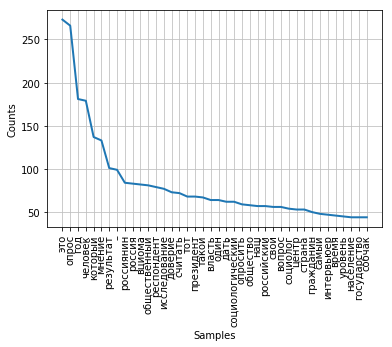

In [37]:
freq = FreqDist(normal_forms) 
freq.plot(40, cumulative=False)

In [ ]:
# How to remove the character "-"? 

In [38]:
bigrams = {word: [] for word in set(normal_forms)} 

In [39]:
for i in range(len(normal_forms)-1): #проходимся по всему списку слов normal_forms (до последнего элемента)
    bigrams[normal_forms[i]].append(normal_forms[i+1]) #добавляем в список биграмм для i-го слова i+1-ое слово

print(bigrams)

{'survey': ['год'], 'написать': ['собчак', 'книга', 'коррупция'], 'вкладывать': ['деньга', 'деньга', 'платёжеспособный'], 'поляризация': ['стать', 'общество'], 'команда': ['деньга', 'отказаться'], 'закредитованность': ['население'], 'институция': ['такой'], 'полностью': ['устраивать', 'изменить', 'среди', 'ломаться', 'лишать', 'искоренить', 'поддаться', 'коррелироваться', 'подчинить', 'объяснить'], 'незаметно': ['е'], 'зарплата': ['омск', 'прийтись', 'больший', 'купить', 'купить', 'считать', 'неулучшаться'], 'управление': ['общественный', 'общественный', 'общественный', 'общественный', 'запах', 'мочь'], 'корреспондент': ['медуза'], 'убить': ['боинг'], 'заработать': ['сидеть', 'р', 'р', 'рыночный'], 'провал': ['конец', 'смочь'], 'фактор': ['вертикальный', 'скоррелировать', 'выйти', 'казаться', 'поэтому', 'формирование', 'обусловливать', 'назвать', 'называться', 'это', 'определять', 'оценка'], 'брежневский': ['пора', 'прошлое'], 'вуз': ['размещать', 'оформление'], 'смирнов': ['полагать',

In [40]:
E = {}
for i,a in enumerate(bigrams):
    S = bigrams[a]; S.sort()
    T = {}; c = S[0]; n = 0
    for z in S:
        if z == c: n = n+1
        else: T[c] = n; c = z; n = 1
    T[c] = n
    print(str(i+1),a,T)
    E[a] = [i+1,T]

1 survey {'год': 1}
2 написать {'книга': 1, 'коррупция': 1, 'собчак': 1}
3 вкладывать {'деньга': 2, 'платёжеспособный': 1}
4 поляризация {'общество': 1, 'стать': 1}
5 команда {'деньга': 1, 'отказаться': 1}
6 закредитованность {'население': 1}
7 институция {'такой': 1}
8 полностью {'изменить': 1, 'искоренить': 1, 'коррелироваться': 1, 'лишать': 1, 'ломаться': 1, 'объяснить': 1, 'поддаться': 1, 'подчинить': 1, 'среди': 1, 'устраивать': 1}
9 незаметно {'е': 1}
10 зарплата {'больший': 1, 'купить': 2, 'неулучшаться': 1, 'омск': 1, 'прийтись': 1, 'считать': 1}
11 управление {'запах': 1, 'мочь': 1, 'общественный': 4}
12 корреспондент {'медуза': 1}
13 убить {'боинг': 1}
14 заработать {'р': 2, 'рыночный': 1, 'сидеть': 1}
15 провал {'конец': 1, 'смочь': 1}
16 фактор {'вертикальный': 1, 'выйти': 1, 'казаться': 1, 'назвать': 1, 'называться': 1, 'обусловливать': 1, 'определять': 1, 'оценка': 1, 'поэтому': 1, 'скоррелировать': 1, 'формирование': 1, 'это': 1}
17 брежневский {'пора': 1, 'прошлое': 1}


338 содержание {'опрос': 1}
339 сми {'абсолютно': 1, 'брать': 1, 'закон': 1, 'манипулирование': 1, 'манипулировать': 4, 'март': 1, 'оказывать': 1, 'правозащитный': 1, 'прижать': 1, 'социолог': 1, 'стать': 1, 'являться': 1}
340 минус {'начинаться': 1, 'оно': 1}
341 экономический {'возможность': 1, 'индекс': 1, 'механизм': 1, 'побежать': 1, 'подъём': 1, 'политический': 1, 'положение': 1, 'проблема': 1, 'развитие': 2, 'рост': 3, 'ситуация': 4, 'транзакция': 1}
342 instagram {'обвинить': 2, 'опубликовать': 1}
343 очень {'банальный': 1, 'близко': 1, 'большой': 2, 'быстро': 1, 'важный': 6, 'единый': 1, 'жёсткий': 1, 'заметный': 1, 'значительный': 1, 'интенсивно': 1, 'интересный': 1, 'легко': 1, 'любопытный': 2, 'многий': 1, 'неплохой': 1, 'низкий': 1, 'нужный': 2, 'опасный': 1, 'плохо': 1, 'пригодиться': 1, 'самобытный': 1, 'сильно': 3, 'сложно': 1, 'сложный': 1, 'стабильный': 1, 'точный': 1, 'умный': 1, 'хитроумный': 1, 'хотеться': 1, 'ценный': 1, 'часто': 1, 'эффективный': 1}
344 замерять 

504 потомок {'ожидать': 1, 'палач': 2}
505 яо {'остаться': 1, 'риторика': 1}
506 край {'ивановский': 1, 'одежда': 1}
507 эстония {'виновный': 2, 'вместе': 1, 'вопрос': 1, 'данные': 1, 'заказ': 1, 'наблюдаться': 1, 'нэ': 1, 'организация': 1, 'поэтому': 1, 'провести': 1, 'следовать': 1, 'сравнение': 1}
508 эволюционировать {'немой': 1}
509 начальство {'вельможа': 1, 'кривиться': 1}
510 калька {'мировой': 1}
511 европеец {'назвать': 1}
512 далёкий {'выталкивать': 1, 'далёкий': 1, 'девушка': 1, 'именно': 1, 'небо': 1, 'оставаться': 1, 'пытаться': 1, 'сравнивать': 1, 'уровень': 1}
513 отказать {'сложный': 1}
514 дмитрия {'журавлев': 1, 'медведев': 1}
515 внести {'рассмотрение': 1}
516 неправильный {'полезть': 1}
517 поубивать {'мультитуд': 1}
518 вести {'исследовательский': 1, 'масштабный': 1, 'нормальный': 1, 'социолог': 1}
519 польза {'должный': 1, 'никакой': 1}
520 простота {'который': 1, 'удобство': 1}
521 вместе {'поиск': 1, 'сильно': 1, 'стандарт': 1, 'украинец': 1, 'характерный': 1, 

671 намереваться {'голосовать': 1}
672 катиться {'ада': 2}
673 взять {'выделить': 1, 'государство': 1, 'карандаш': 1, 'крупный': 1, 'ответственность': 1, 'российский': 1, 'такой': 1}
674 репрезентировать {'взрослый': 1}
675 экономист {'обещать': 1, 'чей': 1, 'это': 1}
676 попытка {'заниматься': 1, 'использовать': 1, 'книжка': 1, 'повлиять': 1, 'провести': 1}
677 жулик {'интервьюер': 1, 'крайне': 1, 'это': 1}
678 визит {'торонто': 1}
679 коммунист {'изучать': 1, 'признавать': 1, 'россия': 1, 'россиянин': 1, 'сталинист': 4, 'тот': 1}
680 минимальный {'значение': 1, 'поддержка': 1, 'член': 1}
681 установка {'бережливость': 1, 'наталья': 1, 'памятник': 1}
682 мозги {'работать': 1, 'фейками': 1}
683 путинский {'назначенец': 1, 'поколение': 2, 'сверхбольшинство': 1}
684 продать {'звать': 1}
685 пренебрежение {'дать': 1}
686 экономика {'делать': 1, 'другой': 1, 'завод': 1, 'известный': 1, 'испытывать': 1, 'означать': 1, 'отдельно': 1, 'пенсионер': 1, 'политика': 1, 'работать': 1, 'россия': 1,

837 рвануть {'вперёд': 1}
838 мутировать {'соответствие': 1, 'эволюционировать': 1}
839 колбаса {'автор': 1, 'играть': 1, 'начать': 1, 'связь': 1}
840 советский {'государство': 1, 'народ': 2, 'пятилетка': 1, 'экономика': 2}
841 опубликование {'информация': 1, 'обнародование': 1}
842 адресовать {'генеральный': 1}
843 обозвать {'использовать': 1, 'целое': 1, 'это': 1}
844 поднимать {'таблица': 1, 'такой': 1}
845 горожанка {'мобильный': 1, 'согласиться': 1, 'уверить': 1}
846 десятка {'тысяча': 1}
847 кружка {'квота': 1, 'один': 1}
848 комфортно {'безопасно': 1}
849 китаец {'японец': 1}
850 телефонный {'интервью': 2, 'обзвон': 1, 'опрос': 3}
851 давление {'корпорация': 1}
852 нацист {'власть': 1}
853 посыл {'опрос': 1}
854 инвестор {'вкладывать': 1, 'запускать': 1}
855 расчёт {'показывать': 1}
856 ходить {'весь': 1, 'выбор': 5, 'значит': 1, 'испытывать': 1, 'квартира': 5, 'митинг': 2, 'проправительственный': 1, 'ходить': 2}
857 сковать {'страх': 1}
858 беседовать {'один': 1}
859 преступный

1004 подавать {'вакансия': 2}
1005 бывалый {'стараться': 1}
1006 ограничить {'возможность': 1, 'действие': 1, 'особенно': 1, 'санкция': 1}
1007 факультет {'институт': 1, 'социология': 1}
1008 вероятность {'месяц': 1, 'ответить': 1, 'превышать': 2, 'предсказывать': 1}
1009 правый {'идти': 1, 'реформа': 1}
1010 декан {'философско': 1}
1011 общество {'абортивный': 1, 'активный': 2, 'вернуться': 1, 'власть': 2, 'возникать': 1, 'вспомнить': 1, 'другой': 1, 'ещё': 1, 'заключить': 1, 'заявить': 1, 'иметь': 1, 'исходить': 1, 'каждый': 1, 'кластер': 1, 'конец': 1, 'конкретный': 1, 'концепт': 1, 'кремль': 1, 'мнение': 1, 'модерн': 1, 'момент': 1, 'наклеивать': 1, 'начинать': 1, 'обозвать': 1, 'оно': 1, 'опросить': 1, 'осознать': 1, 'пользоваться': 1, 'попробовать': 1, 'последний': 2, 'присутствовать': 1, 'происходить': 1, 'расти': 1, 'россия': 1, 'россиянин': 1, 'сам': 1, 'сделать': 1, 'сегодня': 1, 'случай': 1, 'социальный': 1, 'социологический': 2, 'соцопрос': 1, 'сша': 1, 'телефонный': 2, 'то

1170 авторитарный {'настоящий': 1}
1171 ровно {'восприниматься': 1, 'столько': 2}
1172 ненастоящий {'пояснить': 2, 'сказать': 1}
1173 выясниться {'поддерживать': 1}
1174 чётко {'конкретно': 1}
1175 правильный {'путём': 1, 'хороший': 1}
1176 устойчивость {'оценка': 1}
1177 социально {'экономический': 3}
1178 определённый {'анестезический': 1, 'возраст': 1, 'импульс': 1, 'количество': 1, 'поведение': 8, 'рост': 1, 'страх': 1, 'часть': 1}
1179 туристический {'центр': 2}
1180 активность {'верить': 1, 'пошлый': 1, 'россиянин': 1}
1181 заполнять {'интервьюер': 1, 'таблица': 1}
1182 часто {'взять': 1, 'встретить': 1, 'вымогать': 1, 'обсуждать': 1, 'пользоваться': 1, 'сводиться': 1, 'сталкиваться': 1, 'фабриковаться': 1, 'человек': 2}
1183 посылать {'социологический': 1}
1184 подросток {'пьяный': 1, 'самый': 1}
1185 сталинистый {'большинство': 1}
1186 отсеивать {'неугодный': 1}
1187 церковь {'московский': 1, 'северный': 1}
1188 америка {'tвц': 1}
1189 склонность {'такой': 1}
1190 квасной {'том

1337 признаваться {'тяжело': 1}
1338 смешно {'мы': 2}
1339 больница {'детский': 1, 'знакомый': 2, 'начинать': 1, 'почему': 1}
1340 горшков {'руководство': 1}
1341 конкретный {'знакомый': 1, 'локальный': 1, 'метод': 1, 'социальный': 1, 'человек': 2}
1342 телефон {'контролёр': 1, 'общаться': 1, 'позвонить': 1, 'проблема': 1, 'проходить': 3, 'ходить': 2}
1343 московский {'изобретение': 1, 'клерк': 1, 'коллегия': 1, 'масштаб': 1, 'полностью': 1, 'царство': 1, 'юридический': 1}
1344 взрослый {'население': 1}
1345 число {'безусловно': 1, 'верить': 1, 'выйти': 1, 'готовый': 1, 'гражданин': 1, 'десять': 1, 'доверять': 2, 'жить': 1, 'заинтересовать': 2, 'который': 2, 'лицо': 1, 'неэстонец': 2, 'определиться': 3, 'опрос': 1, 'опросить': 2, 'прочий': 1, 'российский': 1, 'россия': 1, 'самый': 1, 'сильный': 1, 'слабый': 1, 'тот': 2, 'траектория': 1, 'человек': 1}
1346 протест {'вообще': 1, 'всякий': 1, 'год': 1, 'действительно': 1, 'иначе': 1, 'который': 1, 'отпасть': 1, 'против': 1, 'путин': 1, 'р

1503 начало {'август': 3, 'год': 2, 'затяжной': 1, 'квартирный': 1, 'опрос': 1, 'опросный': 1, 'раскручиваться': 1, 'х': 6}
1504 совершенно {'абсурдный': 1, 'точно': 1}
1505 замалчивать {'слишком': 1}
1506 зима {'венец': 1}
1507 учёба {'понюхать': 1}
1508 умереть {'процесс': 2}
1509 ранний {'давать': 1, 'делать': 1, 'неинтересно': 1, 'опыт': 1, 'подавляться': 1, 'поддерживать': 1}
1510 расположить {'единый': 1}
1511 зашить {'переменный': 2}
1512 недоступный {'доступ': 1}
1513 полумёртвый {'большинство': 1}
1514 ножка {'буш': 1}
1515 честность {'работа': 1}
1516 расплата {'тяжёлый': 1}
1517 отмечаться {'ноябрь': 2, 'последний': 1, 'такой': 1, 'являться': 1}
1518 методический {'эффект': 1}
1519 чужое {'достижение': 1, 'оно': 1}
1520 удивить {'учёный': 1}
1521 слабый {'контакт': 1, 'локальный': 1, 'недоверие': 2, 'связь': 3, 'это': 1}
1522 завязать {'беседа': 1}
1523 дверь {'бабушка': 1, 'безопасность': 1, 'готовый': 1, 'жильцов': 1, 'конец': 1, 'открыть': 2, 'скандал': 1, 'схватить': 1}


1670 обозначать {'респондент': 2}
1671 кровавый {'режим': 1}
1672 александр {'бурков': 1, 'круз': 1}
1673 прожект {'хайп': 1}
1674 транспортный {'доступность': 1}
1675 пустой {'звук': 1}
1676 округа {'выборка': 1, 'рамка': 1}
1677 компания {'saar': 1, 'настолько': 1, 'один': 1, 'орган': 1, 'подъезд': 1}
1678 пересадка {'это': 1}
1679 процентный {'пункт': 2}
1680 другой {'вообще': 1, 'вопрос': 1, 'дать': 4, 'дело': 3, 'другой': 1, 'замечать': 1, 'категория': 1, 'клише': 1, 'левада': 1, 'молодая': 1, 'ожидать': 1, 'отрасль': 1, 'параметр': 2, 'показатель': 1, 'полтора': 1, 'протестный': 2, 'социологический': 1, 'сравнить': 1, 'ссылаться': 1, 'страна': 1, 'тенденция': 2, 'хернить': 1, 'человек': 1, 'этап': 1}
1681 внимательность {'целеустремлённость': 1}
1682 лингвистический {'культурный': 1}
1683 никто {'вдохновлять': 1, 'вспоминать': 1, 'думать': 1, 'толком': 1}
1684 интересный {'вещь': 1, 'вопрос': 1, 'исключение': 1, 'камбэк': 1, 'момент': 1, 'процент': 1, 'работа': 1}
1685 метафора {

1836 жёстко {'ограничить': 1}
1837 будущее {'коммунистический': 1, 'мёртвый': 1, 'настоящий': 1, 'политический': 1, 'привести': 1, 'регион': 1, 'солидарность': 1}
1838 разграбить {'отобрать': 1}
1839 солидаризация {'кажется': 1, 'какой': 1, 'канал': 1, 'стать': 1, 'человек': 1}
1840 напомнить {'год': 1, 'духовный': 1, 'самый': 1, 'темп': 1}
1841 отклонение {'какой': 1}
1842 обработка {'анализ': 1}
1843 позиционироваться {'аполитичный': 1}
1844 гарантировать {'государство': 1, 'трудоустройство': 1}
1845 нахрен {'смотреть': 1, 'ходить': 1}
1846 правило {'апеллировать': 1, 'безопасность': 1, 'действовать': 1, 'заходить': 1, 'институт': 1, 'один': 1, 'опубликование': 1}
1847 перестать {'бояться': 1, 'доверять': 1, 'жить': 1}
1848 приобрести {'денис': 1, 'качество': 1}
1849 красиво {'получаться': 1}
1850 кремлёвский {'пропаганда': 2, '–': 1}
1851 это {'абсолютно': 1, 'агентство': 1, 'анкета': 1, 'безусловно': 1, 'большой': 1, 'быть': 1, 'важный': 1, 'вид': 1, 'видимый': 1, 'возможный': 1, '

2003 проверка {'насколько': 1}
2004 резкий {'всплеск': 1, 'поляризация': 1, 'скачок': 1}
2005 отчёт {'левада': 1, 'процент': 1, 'результат': 3}
2006 александра {'архипов': 1}
2007 сакрализация {'российский': 1}
2008 оценить {'деятельность': 1, 'меняться': 1, 'относительный': 1, 'посмотреть': 1, 'удобство': 1, 'шкала': 1, 'эффективность': 1, '–': 1}
2009 коллекция {'демонстрировать': 1, 'часы': 1}
2010 двойник {'cталина': 1}
2011 близко {'знакомый': 1, 'удобно': 1}
2012 столица {'москва': 2, 'например': 1, 'наш': 1, 'некоторые': 1, 'один': 1, 'регион': 5}
2013 ценный {'результат': 1}
2014 твёрдо {'согласно': 1}
2015 окружный {'суд': 1}
2016 олигарх {'чиновник': 1}
2017 глупость {'вернуться': 1, 'политический': 1}
2018 искренне {'верить': 1}
2019 пересчитать {'сумма': 2}
2020 доказать {'опровергнуть': 1}
2021 коммент {'обсуждение': 1}
2022 заморочить {'литься': 1}
2023 знать {'английский': 1, 'весь': 1, 'жить': 1, 'коллекция': 1, 'мнение': 1, 'общественный': 1, 'общество': 1, 'обязательн

2169 рисовать {'рейтинг': 1}
2170 нечто {'дурной': 1}
2171 иностранный {'агент': 1, 'бояться': 1, 'дело': 1, 'деньга': 1, 'идея': 1, 'опыт': 1, 'технология': 1}
2172 усложнить {'деятельность': 1}
2173 четверть {'час': 1, 'человек': 1, 'это': 1}
2174 фоэ {'включить': 1}
2175 показатель {'группа': 1, 'двоемыслие': 1, 'недоверие': 1, 'ниже': 1, 'около': 1, 'очень': 1, 'протестный': 1, 'равняться': 1, 'самый': 1, 'составлять': 4, 'социальный': 5, 'считать': 1, 'тот': 1, 'эстонец': 1}
2176 дредова {'звонить': 1}
2177 прекрасно {'понимать': 1, 'понять': 1}
2178 вражеский {'мнение': 1}
2179 союз {'коммунист': 1}
2180 меньшинство {'левада': 1, 'наш': 1, 'особенно': 1, 'параллельно': 1, 'сексуальный': 1}
2181 строиться {'парадокс': 1}
2182 усиливаться {'недоверие': 1}
2183 занимать {'один': 3}
2184 академия {'вызвать': 1}
2185 грозить {'штраф': 1}
2186 верно {'самый': 1}
2187 малооплачиваемый {'труд': 1}
2188 камбэк {'который': 1}
2189 сожаление {'опрос': 1, 'склонность': 1, 'среди': 1}
2190 со

2336 бежать {'прийти': 1}
2337 дискредитировать {'сегодня': 1}
2338 поддаться {'пропаганда': 1}
2339 конспиролог {'возникнуть': 1}
2340 постсоветский {'государство': 1}
2341 недоговаривать {'бывать': 1}
2342 подумать {'прежде': 1}
2343 сталинский {'большинство': 1, 'время': 1, 'репрессия': 1, 'селекция': 1, 'ссср': 1}
2344 бар {'вороватый': 1}
2345 область {'должность': 1, 'компания': 1, 'набрать': 1, 'очень': 1}
2346 стоить {'искать': 1, 'нападение': 1, 'напомнить': 1, 'обратить': 1, 'ожидать': 1, 'ответ': 1, 'ссылаться': 1, 'это': 1}
2347 компенсироваться {'свой': 1}
2348 страшный {'банка': 1, 'случаться': 1}
2349 весной {'год': 1}
2350 активизироваться {'опрос': 2}
2351 сволочь {'система': 1}
2352 репрезентативный {'выборка': 2, 'проводиться': 1, 'тот': 1}
2353 чиновник {'депутат': 1, 'коммерсант': 1, 'который': 1, 'позволить': 1, 'произносить': 1, 'прочий': 1}
2354 производительность {'значительный': 1, 'труд': 1, 'увеличиваться': 1}
2355 денежный {'средство': 2}
2356 углублённый {

2502 движение {'разный': 1}
2503 низкий {'верно': 1, 'духовный': 1, 'зарплата': 1, 'информированность': 1, 'мир': 1, 'производительность': 1, 'результат': 1, 'социологический': 1, 'среди': 1, 'уровень': 2}
2504 формула {'лёха': 1, 'успех': 1}
2505 закрыть {'гештальт': 1, 'дверь': 1}
2506 крупенниковпо {'слово': 1}
2507 думать {'будущее': 1, 'дать': 1, 'иной': 1, 'помнить': 1, 'работа': 1, 'результат': 6, 'социолог': 1, 'страна': 1, 'узнать': 1, 'хотеть': 1, 'это': 5, '–': 1}
2508 пункт {'год': 5, 'нормальный': 1, 'однако': 1, 'последующий': 1, 'причём': 1, 'публикация': 1, 'субъект': 2, 'часто': 1}
2509 формулировка {'вопрос': 1, 'задаваться': 1}
2510 самоуправление {'суд': 1, 'это': 1}
2511 глава {'вциома': 4, 'государство': 7, 'научно': 1, 'регион': 3, 'социологический': 1}
2512 фото {'документ': 2, 'представить': 1}
2513 возможный {'какой': 1, 'москва': 1, 'объяснение': 2, 'повторение': 1, 'проведение': 1, 'размещать': 1}
2514 сувенир {'оплачиваться': 1}
2515 подробный {'уверять': 1

2669 кухня {'научить': 1, 'начало': 1}
2670 общественность {'опрос': 1, 'существовать': 1}
2671 приурочить {'день': 1, 'к': 2}
2672 выполнять {'наиболее': 1}
2673 истерика {'гоген': 1, 'другой': 1}
2674 сократить {'расход': 1, 'стать': 1}
2675 ведущий {'аналитик': 3, 'научный': 1}
2676 открытый {'вопрос': 1, 'недовольство': 1, 'эстония': 1}
2677 неофициальный {'профессиональный': 1}
2678 фирма {'полевой': 1}
2679 корея {'сингапур': 1}
2680 аудитория {'дискуссия': 2, 'необходимость': 2}
2681 феминизм {'гей': 1}
2682 общемировой {'история': 1, 'тренд': 1}
2683 государственничество {'какой': 1}
2684 участок {'воспитание': 1}
2685 газа {'чётко': 1}
2686 вид {'большой': 1, 'возраст': 1, 'выглядеть': 1, 'данные': 1, 'который': 1, 'наука': 1, 'начинать': 1, 'опрос': 1, 'социология': 1, 'старший': 1, 'сувенир': 1}
2687 прийти {'всероссийский': 1, 'новый': 1, 'область': 1}
2688 версия {'событие': 1}
2689 буш {'число': 1}
2690 техноутопический {'прожект': 1}
2691 стратификационный {'модель': 1}


2835 переговариваться {'недоверчивый': 1}
2836 вызвать {'громкий': 1, 'появление': 1, 'шумиха': 1}
2837 согласиться {'принять': 2}
2838 выяснить {'вы': 1, 'отношение': 1, 'самый': 1, 'сколько': 1, 'социолог': 1, 'шторм': 1}
2839 смягчение {'пенсионный': 1}
2840 забытый {'судить': 1}
2841 касательно {'пенсионный': 1}
2842 объём {'качество': 1, 'получать': 2, 'респондент': 1, 'тысяча': 1}
2843 собрать {'дать': 1, 'это': 1}
2844 опубликовать {'дать': 1, 'март': 2, 'опрос': 2, 'свежий': 1, 'фотография': 1}
2845 манчестер {'середина': 1}
2846 выдающийся {'человек': 2}
2847 соединение {'западный': 1, 'хороший': 1, 'электричка': 1}
2848 тотчас {'понуро': 1}
2849 похорошеть {'москва': 1}
2850 протестный {'активность': 3, 'акция': 1, 'глупость': 1, 'митинг': 1, 'молодёжь': 1, 'настроение': 6, 'потенциал': 2, 'это': 1}
2851 объективно {'субъективно': 1}
2852 реализовывать {'государственный': 1, 'насколько': 1}
2853 охота {'пересадить': 1}
2854 беларусь {'весь': 1}
2855 культ {'идолопоклонство': 

3002 принятие {'жизненный': 1, 'назреть': 1, 'решение': 3}
3003 консалтинг {'политолог': 1}
3004 никуда {'делиться': 1, 'спешить': 1}
3005 ничто {'ново': 1}
3006 выражение {'городской': 1, 'свой': 1, 'современный': 1}
3007 кровь {'диалог': 1}
3008 желающий {'подзаработать': 1, 'сфотографироваться': 1}
3009 анкета {'двадцать': 1, 'дополнять': 2, 'задавать': 1, 'занимать': 2, 'заранее': 1, 'интервьюер': 1, 'количество': 1, 'ниже': 1, 'обзвон': 1, 'обрабатываться': 1, 'платить': 1, 'помимо': 1, 'поэтому': 1, 'пятно': 1, 'респондент': 2, 'самостоятельно': 1, 'скрининговый': 1, 'сложный': 1, 'статья': 1, 'тщательно': 1, 'умелый': 1}
3010 подвижка {'направление': 1}
3011 высказывать {'готовность': 1}
3012 субъективно {'нужно': 1, 'объективно': 1}
3013 поведение {'агрегация': 1, 'большинство': 1, 'два': 1, 'кризис': 1, 'опрос': 2, 'отмечаться': 1, 'повиноваться': 1, 'протяжение': 1, 'сказать': 1, 'тип': 1, 'человек': 2}
3014 зверь {'вернуться': 1}
3015 специнвестконтракт {'фонд': 1}
3016 цент

3168 площадка {'локация': 1, 'собраться': 1, 'стрессовый': 1}
3169 ползучий {'ресталинизация': 2}
3170 ощутить {'несколько': 1, 'тот': 1}
3171 удобно {'понятно': 1}
3172 вскоре {'попытка': 1}
3173 гребенка {'вместо': 1}
3174 винить {'трудно': 1}
3175 психология {'народ': 1}
3176 кертман {'разговор': 1, 'сказать': 2, 'считать': 3}
3177 чёрный {'белых': 1, 'дыра': 1}
3178 сначала {'агентство': 1, 'конец': 1, 'нарушать': 1, 'смерть': 1}
3179 наименьший {'сопротивление': 1}
3180 считать {'бывший': 1, 'виновный': 2, 'возможный': 3, 'год': 1, 'гораздо': 1, 'итог': 1, 'кара': 1, 'лишь': 1, 'мнение': 3, 'мощный': 1, 'научно': 1, 'неделя': 1, 'необходимый': 1, 'опрос': 5, 'опросить': 1, 'основный': 1, 'подобный': 1, 'политически': 1, 'получить': 1, 'помогать': 1, 'порог': 1, 'президент': 2, 'пришлый': 1, 'проведение': 2, 'публиковать': 2, 'результат': 6, 'респондент': 3, 'реформа': 1, 'руководитель': 1, 'самый': 1, 'скорее': 1, 'сложно': 1, 'собчак': 4, 'современный': 1, 'социологический': 2, '

3335 руль {'настолько': 1}
3336 желание {'нужный': 1}
3337 действовать {'например': 1, 'начинать': 1, 'план': 1, 'правительство': 1, 'рамка': 1, 'тот': 1}
3338 роль {'играть': 1, 'присяжный': 2, 'улица': 1, 'формирование': 1, 'это': 1}
3339 игорь {'крупенников': 1, 'крупенниковпо': 1}
3340 отклоняться {'принять': 1}
3341 прибавлять {'каждый': 1}
3342 осень {'год': 1}
3343 соснина {'говорить': 1, 'эффективно': 1}
3344 прежде {'бизнес': 1, 'материальный': 1, 'пенсионный': 1, 'работник': 1, 'сказать': 1, 'социальный': 1, 'телевидение': 1}
3345 экономия {'–': 1}
3346 общенародный {'союз': 1}
3347 негативно {'коррелировать': 1, 'настроить': 1, 'относиться': 1}
3348 получаться {'посмотреть': 1, 'поэтому': 1, 'разговор': 1, 'россия': 1, 'самый': 1, 'сильно': 1, 'удовлетворить': 1}
3349 нехватка {'деньга': 1}
3350 корреляция {'прослеживаться': 1}
3351 сложиться {'иной': 1, 'респондент': 1, 'ситуация': 1}
3352 список {'адрес': 1, 'ответ': 1, 'сталин': 1}
3353 увеличивать {'рождаемость': 1}
3354

3501 мамочка {'пенсионер': 1}
3502 объяснимый {'–': 1}
3503 подробно {'исследование': 1, 'обьяснил': 1, 'рассказывать': 1}
3504 включаться {'называть': 1}
3505 сюжет {'научно': 1}
3506 вспомнить {'американский': 1, 'исходный': 1, 'отличный': 1, 'позднесоветский': 1, 'страничка': 1}
3507 универсальный {'объяснение': 1}
3508 семь {'восемь': 1, 'религия': 1, 'часы': 1}
3509 пародия {'должный': 1, 'социология': 1, 'телевидение': 1}
3510 задать {'вопрос': 3, 'отказать': 1, 'условие': 1}
3511 делегирование {'техника': 1}
3512 обратный {'корреляция': 1, 'связь': 4, 'состоять': 1, 'сторона': 1}
3513 воскресение {'март': 1, 'мыть': 1}
3514 тратить {'заведомо': 1}
3515 европейский {'социала': 1, 'страна': 1, 'цивилизация': 1}
3516 разница {'медиамиро': 1, 'получать': 1, 'это': 2}
3517 климатический {'некритический': 1}
3518 срок {'правило': 1, 'проведение': 1, 'считать': 2}
3519 характеристика {'нетушка': 1, 'объект': 1, 'объяснять': 1, 'переход': 1}
3520 технофобия {'расти': 1}
3521 воспринять 

3668 шествие {'против': 1}
3669 утро {'болеть': 1}
3670 подробность {'условие': 1}
3671 сплочение {'русский': 1}
3672 фейками {'иной': 1}
3673 частность {'автор': 1, 'архаизация': 1, 'дело': 1, 'левада': 1, 'российский': 1, 'ципкр': 1}
3674 соцопрос {'безусловно': 1, 'выразить': 1, 'гражданин': 5, 'доверие': 1, 'доверять': 1, 'единый': 1, 'задача': 1, 'закон': 1, 'заявить': 1, 'мнение': 1, 'необходимый': 1, 'нередко': 1, 'около': 1, 'отражать': 1, 'подготовить': 3, 'помогать': 1, 'посвятить': 1, 'представлять': 1, 'представляться': 1, 'причём': 1, 'провести': 1, 'проводить': 1, 'прогноз': 1, 'просто': 1, 'россия': 1, 'скорее': 1, 'создаваться': 1, 'составить': 1, 'такой': 1, 'течение': 1, 'фёдоров': 1}
3675 веко {'вдохнуть': 1}
3676 длительный {'перспектива': 1}
3677 вячеслав {'смирнов': 1}
3678 воздействие {'два': 1, 'новый': 1, 'один': 1}
3679 ждать {'государство': 1, 'доказательство': 1, 'надеяться': 1, 'некоторый': 1, 'ответ': 1, 'пенсия': 1, 'точно': 1, 'фёдоров': 1, 'это': 1}
368

3834 разговор {'вестись': 1, 'вокруг': 1, 'вопрос': 1, 'мк': 2, 'момент': 1, 'рбк': 1, 'такой': 1, 'часто': 1, 'человек': 1}
3835 характерный {'либеральный': 1, 'социологический': 1, 'это': 1}
3836 редко {'готовый': 1}
3837 миг {'тотчас': 1}
3838 важность {'иной': 1}
3839 целесообразность {'заключение': 1}
3840 заключение {'пакт': 1}
3841 неэстонец {'активно': 1, 'воспринимать': 1, 'й': 2, 'например': 1, 'опрос': 1, 'пассивно': 1, 'тип': 1, 'целое': 1, 'эстонец': 1, 'эстония': 2}
3842 летний {'отрицательный': 1}
3843 парикмахер {'это': 1}
3844 петра {'милосердов': 1}
3845 бывший {'восточный': 1, 'исторический': 1, 'руководитель': 1, 'сотрудник': 1, 'ссср': 1}
3846 хватить {'разговор': 1}
3847 path {'dependence': 1}
3848 тотальный {'политизация': 1}
3849 юридический {'академия': 1, 'последствие': 1, 'форма': 1}
3850 исчезнуть {'понимание': 1, 'это': 1}
3851 отдыхать {'нужный': 1, 'радоваться': 1}
3852 дмитрий {'бадовский': 1, 'новиков': 2, 'орлов': 1, 'соснина': 2}
3853 увольнять {'инду

In [41]:
net = open("pajek.net", "w")
n = len(E)
net.write('{0}{1}\n'.format('*vertices ',n))
for i,a in enumerate(E):
    net.write('{0} "{1}"\n'.format(E[a][0], a))
net.write("*arcs\n")
for a in E:
    i = E[a][0]
    for b in E[a][1]:
        j = E[b][0]; k = E[a][1][b]
        net.write('{0} {1} {2}\n'.format(i,j,k))
net.close()

In [ ]:
# Other way 

In [80]:
E = {}
for i,a in enumerate(bigrams):  
  S = sorted(bigrams[a]); T = {}
  if S:
    c = S[0]; n = 0
    for z in S:
      if z == c: n = n+1
      else: T[c] = n; c = z; n = 1
    T[c] = n;
  E[a] = [i+1,T]
print(i+1,a,T)

3162 летие {'екатеринбург': 1}


In [81]:
net = open("pajek.net", "w")
net.write('*vertices {0}\n'.format(len(E)))
for i,a in enumerate(E): net.write('{0} "{1}"\n'.format(E[a][0],a))
net.write("*arcs\n")
for a in E:
  for b in E[a][1]:
    net.write('{0} {1} {2}\n'.format(E[a][0],E[b][0],E[a][1][b]))
net.close()

In [ ]:
# TF index 

In [83]:
import collections
def tf(text):
    tf_text = collections.Counter(normal_forms)
    for i in tf_text:
        tf_text[i] = tf_text[i]/float(len(normal_forms))
    return tf_text

print(tf(text))

Counter({'опрос': 0.022720897615708276, 'это': 0.014446002805049088, 'вопрос': 0.01185133239831697, 'который': 0.011360448807854138, 'человек': 0.00932678821879383, 'путин': 0.009046283309957924, 'мнение': 0.008906030855539973, 'вциома': 0.008485273492286114, 'президент': 0.007082748948106592, 'доверие': 0.006802244039270687, 'рейтинг': 0.0064516129032258064, 'доверять': 0.005960729312762973, 'респондент': 0.005820476858345021, 'социолог': 0.005610098176718092, 'общественный': 0.00546984572230014, '–': 0.005259467040673212, 'год': 0.005049088359046283, 'храм': 0.005049088359046283, 'власть': 0.004768583450210378, 'интервьюер': 0.004628330995792427, 'результат': 0.00455820476858345, 'центр': 0.00455820476858345, 'говорить': 0.004067321178120617, 'такой': 0.004067321178120617, 'дать': 0.004067321178120617, 'сказать': 0.003997194950911641, 'екатеринбург': 0.003997194950911641, 'исследование': 0.0038569424964936885, 'ответ': 0.0037166900420757365, 'строительство': 0.0036465638148667602, 'р

In [84]:
freq = nltk.FreqDist(tf(text)) 
for key, val in freq.items(): 
    print (str(key) + ':' + str(val))

снижение:0.0009116409537166901
поддержка:0.0011220196353436186
путин:0.009046283309957924
ностальгия:7.012622720897616e-05
ссср:0.00021037868162692848
соцопрос:0.002244039270687237
популярный:0.00021037868162692848
сми:0.0009116409537166901
доверие:0.006802244039270687
среди:0.0007012622720897616
россиянин:0.003576437587657784
падать:0.0011921458625525946
многие:0.0008415147265077139
опасаться:0.0003506311360448808
говорить:0.004067321178120617
правда:0.0005610098176718093
относиться:0.0009817671809256663
результат:0.00455820476858345
доверять:0.005960729312762973
социологический:0.0019635343618513326
опрос:0.022720897615708276
вопрос:0.01185133239831697
задавать:0.0014726507713884993
каждый:0.0021037868162692847
сталкиваться:0.0006311360448807854
они:0.0005610098176718093
быть:0.0023141654978962134
журналист:0.0011921458625525946
эксперт:0.0003506311360448808
среднестатистический:7.012622720897616e-05
житель:0.0025245441795231417
почему:0.0018232819074333801
совпадать:7.01262272089761

подтверждать:0.00014025245441795232
статус:0.00028050490883590464
спокойно:7.012622720897616e-05
показаться:0.00014025245441795232
профан:7.012622720897616e-05
итак:7.012622720897616e-05
никакой:0.0011921458625525946
восприниматься:0.0004908835904628332
что:7.012622720897616e-05
либо:0.0007713884992987377
пытаться:0.0008415147265077139
расколоть:0.00014025245441795232
держаться:7.012622720897616e-05
повторять:7.012622720897616e-05
общепринятый:7.012622720897616e-05
клише:7.012622720897616e-05
выдавать:0.00014025245441795232
твой:7.012622720897616e-05
ждать:0.0007713884992987377
предлагать:0.0007012622720897616
вариант:0.002805049088359046
правильный:0.0004908835904628332
экзамен:0.00014025245441795232
запутать:0.00014025245441795232
сбить:7.012622720897616e-05
поддаваться:0.00014025245441795232
завалить:7.012622720897616e-05
выдать:0.00021037868162692848
соответственно:0.00021037868162692848
единственный:0.0003506311360448808
обсуждать:0.00028050490883590464
сподвигнуть:7.0126227208976

ясно:0.00014025245441795232
разбить:0.00014025245441795232
мамочка:0.00021037868162692848
коляска:0.00014025245441795232
погулять:0.00014025245441795232
заказчик:0.0009817671809256663
грустно:0.00014025245441795232
произойти:0.0005610098176718093
разрешить:0.00014025245441795232
вмиг:7.012622720897616e-05
обсуждение:0.00028050490883590464
течение:0.0004908835904628332
подсчёт:0.00021037868162692848
отчитываться:0.00014025245441795232
мутный:7.012622720897616e-05
чей:7.012622720897616e-05
контракт:0.00014025245441795232
заставить:0.00014025245441795232
высокомерный:7.012622720897616e-05
переговоры:0.00021037868162692848
откатить:7.012622720897616e-05
впечатлять:7.012622720897616e-05
заморочить:7.012622720897616e-05
голова:0.00021037868162692848
получиться:0.00028050490883590464
прорабатывать:7.012622720897616e-05
гд:7.012622720897616e-05
компромисс:0.00014025245441795232
возможный:0.0003506311360448808
делаться:0.00014025245441795232
законный:7.012622720897616e-05
уточняться:7.012622720

кризис:0.00021037868162692848
закончиться:0.00014025245441795232
увеличиваться:0.00021037868162692848
надежда:0.00014025245441795232
оправдаться:0.00014025245441795232
негативно:0.00028050490883590464
влиять:0.0003506311360448808
разъяснить:7.012622720897616e-05
применять:0.00014025245441795232
прямо:0.00028050490883590464
отечественный:0.00014025245441795232
фамилия:0.00028050490883590464
составлять:0.0003506311360448808
недовольство:0.00014025245441795232
коррелировать:0.00021037868162692848
сведение:0.00014025245441795232
содержаться:7.012622720897616e-05
премьер:7.012622720897616e-05
министр:7.012622720897616e-05
коммунист:7.012622720897616e-05
потребовать:0.00021037868162692848
c:7.012622720897616e-05
низок:7.012622720897616e-05
вторичный:0.00014025245441795232
тасс:7.012622720897616e-05
лично:0.00014025245441795232
ошибаться:7.012622720897616e-05
отслеживать:7.012622720897616e-05
противоречить:7.012622720897616e-05
ценить:7.012622720897616e-05
профессионализм:7.012622720897616e-0

решиться:7.012622720897616e-05
парадоксальный:7.012622720897616e-05
оппозиционный:7.012622720897616e-05
реж:0.00014025245441795232
оппозиция:7.012622720897616e-05
зачастую:0.00014025245441795232
кит:7.012622720897616e-05
росстат:0.0004908835904628332
исполнительный:0.00014025245441795232
исключительно:7.012622720897616e-05
фактический:7.012622720897616e-05
расход:7.012622720897616e-05
корова:7.012622720897616e-05
долг:7.012622720897616e-05
болезнь:7.012622720897616e-05
интересовать:0.00014025245441795232
духовный:7.012622720897616e-05
присвоить:7.012622720897616e-05
иностранный:0.00014025245441795232
агент:0.00021037868162692848
зарубежный:7.012622720897616e-05
грант:7.012622720897616e-05
собственность:7.012622720897616e-05
организационный:7.012622720897616e-05
одинаковый:7.012622720897616e-05
очно:7.012622720897616e-05
истинный:7.012622720897616e-05
придумать:7.012622720897616e-05
направление:0.00028050490883590464
вероника:0.00014025245441795232
бизюков:0.00014025245441795232
соблюде

подразумеваться:7.012622720897616e-05
молчаливый:7.012622720897616e-05
неизвестный:7.012622720897616e-05
доступ:0.00014025245441795232
медиа:0.00021037868162692848
привилегированный:7.012622720897616e-05
слышимый:7.012622720897616e-05
активный:7.012622720897616e-05
массмедиа:7.012622720897616e-05
ночлежка:7.012622720897616e-05
стиральный:7.012622720897616e-05
бездомный:0.00014025245441795232
савеловский:7.012622720897616e-05
вокзал:7.012622720897616e-05
конституция:7.012622720897616e-05
запрещать:7.012622720897616e-05
провоцировать:7.012622720897616e-05
вражда:7.012622720897616e-05
превосходство:7.012622720897616e-05
прима:7.012622720897616e-05
разогнаться:7.012622720897616e-05
декомпозировать:7.012622720897616e-05
монолитный:7.012622720897616e-05
разнородный:7.012622720897616e-05
новшество:7.012622720897616e-05
улучшать:7.012622720897616e-05
технологический:7.012622720897616e-05
интеллектуальный:0.00014025245441795232
раскрыть:7.012622720897616e-05
подобный:7.012622720897616e-05
отраз

In [ ]:
# How to sort? 